# Principal Component Analysis (PCA) - Step by Step Demonstration
### A detailed walkthrough with a numeric example

## Step 1: Standardize the Data
We standardize the data by subtracting the mean and dividing by the standard deviation.

In [1]:
import numpy as np
import pandas as pd

# Example data (Height and Weight)
data = {'Height': [150, 160, 170],
        'Weight': [50, 60, 70]}

df = pd.DataFrame(data)

# Standardizing the data
standardized_df = (df - df.mean()) / df.std()

standardized_df

,Height,Weight
0,-1.0,-1.0
1,0.0,0.0
2,1.0,1.0


## Step 2: Calculate Covariance Matrix
The covariance matrix tells us how the features vary together.

In [2]:
# Calculate covariance matrix
cov_matrix = standardized_df.cov()

cov_matrix

,Height,Weight
Height,1.0,1.0
Weight,1.0,1.0


## Step 3: Compute Eigenvalues and Eigenvectors
Eigenvalues represent the variance explained by each principal component.
Eigenvectors represent the directions of these components.

In [3]:
# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

eigenvalues, eigenvectors

(array([2., 0.]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

## Step 4: Sort Eigenvalues and Eigenvectors
Sort eigenvalues in descending order and select the corresponding eigenvectors.

In [4]:
# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

sorted_eigenvalues, sorted_eigenvectors

(array([2., 0.]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

## Step 5: Choose Principal Components
Choose the top components based on the explained variance.

In [5]:
# Calculate the proportion of variance explained by each eigenvalue
explained_variance = sorted_eigenvalues / np.sum(sorted_eigenvalues)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

explained_variance, cumulative_variance

(array([1., 0.]), array([1., 1.]))

## Step 6: Transform the Data
Project the original data onto the new principal components.

In [6]:
# Project data onto the principal components
X_pca = standardized_df.dot(sorted_eigenvectors)

# Show transformed data
X_pca


,0,1
0,-1.414214,0.0
1,0.000000,0.0
2,1.414214,0.0


## Final Result
The transformed data has been reduced to the principal components. This new data represents the most important variance of the original dataset.

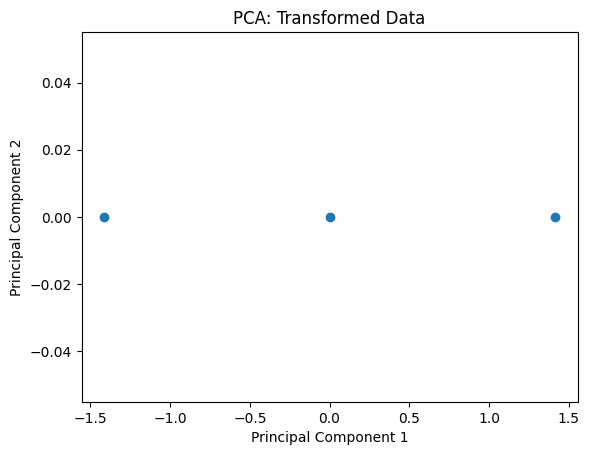

In [7]:
import matplotlib.pyplot as plt

# Plot the first two principal components
plt.scatter(X_pca.iloc[:, 0], X_pca.iloc[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Transformed Data')
plt.show()

# Optimal k selection
There is no standard rule for that: we simply use cumulative sum methods.

In [8]:
import numpy as np

# Example eigenvalues (obtained from covariance matrix)
eigenvalues = np.array([4.5, 2.0, 0.9, 0.1])

# Calculate the total variance (sum of eigenvalues)
total_variance = np.sum(eigenvalues)

# Calculate the cumulative variance explained
cumulative_variance = np.cumsum(eigenvalues) / total_variance

# Set the threshold for the cumulative variance (e.g., 90%)
threshold = 0.90

# Find the smallest k such that the cumulative variance is >= threshold
k = np.where(cumulative_variance >= threshold)[0][0] + 1  # +1 to get 1-based index

print(f"Optimal k (number of components to retain {threshold*100}% variance): {k}")


Optimal k (number of components to retain 90.0% variance): 3
